(3, 32333)
Test_0


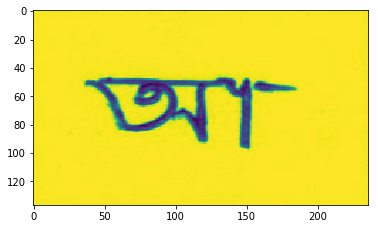

In [77]:
pd = table.to_pandas()
print(pd.shape)
x = pd.get_values()
y = x[0]
print(y[0])
y = y[1:]

import matplotlib.pyplot as plt
import numpy as np
y = y.astype('float32')
y = np.reshape(y, (137,236))

plt.imshow(y)

In [30]:
#don't run this, this is the one that was written when converting image data from parquet to csv without crashing the ram and whole laptop
import pandas as pd
import threading as thd

import pyarrow.parquet as pq

train_data = pq.read_table('garbage/train_image_data_1.parquet').to_pandas()

def saveData(i):
    pf=train_data.iloc[i*10000:(i+1)*10000].to_csv('garbage/img_data/img_train_data_1/da'+str(i)+'.csv')
    
if __name__=='__main__':
    mt=[]
    for i in range(5):
        t=thd.Thread(target=saveData, name="th"+str(i),args=[i])
        t.start()
        mt.append(t)
    for t in mt:
        t.join()
    print('done')
datatosave=train_data.iloc[40000:50000]
print(len(datatosave))import time

st = time.time()
thr = thd.Thread(target=datatosave.to_csv('garbage/img_data/da4.csv'))
thr.start()
thr.join()
end=time.time() 
import time

st = time.time()
thr = thd.Thread(target=datatosave.to_csv('garbage/img_data/da4.csv'))
thr.start()
thr.join()
end=time.time()
print(end-st)

KeyError: 'Test_0'

In [50]:
import pandas as pd

x = list(pd.read_parquet('garbage/train_image_data_0.parquet', columns=['image_id']).to_numpy())
x = np.reshape(x, 50210)
print(x[89])

Train_89


In [48]:
import numpy as np

x = x.values.tolist()
print(x[8])

['Train_8']


In [21]:
for i in range(5):
    
    pd.DataFrame(x[(i*10042):((i+1)*10042)]).to_csv('garbage/img_data/train_data'+str(i)+'.csv',index=False)

In [ ]:


nooffiles=5
basePath = 'garbage/img_data/'

for i in range(nooffiles):
    dat = pd.DataFrame()

In [ ]:
import pandas as pd
import threading as thr

nooffiles=5
batch_size = 10
total = 50210
inOne = int(total/nooffiles)
basePath = 'garbage/img_data/'
col = 'image_id'
fileName = 'train_data'
threads=[]
#for j in range(3):

def rdNwt(j, lock):
    x = pd.read_parquet('garbage/train_image_data_0.parquet', columns=[str(j)])
    m=[]
    for i in range(nooffiles):
        d=list(pd.DataFrame(x[i*inOne:((i+1)*inOne)]).to_numpy())
        m.append(d)
    
    write(m, lock)
        
def write(m,lock):
    count = 0
    for d in m:
        file = basePath+fileName+str(count)+'.csv'
        lock.acquire()
        par = pd.read_csv(file)
    #print(type(d), len(d), d[435], np.shape(d))
        d=np.reshape(d, np.shape(d)[0])
        par[str(j)]=d
    #print('not here')
        par.to_csv(file, index=False)
        lock.release()
        count+=1
def onTh(j,lock):
    global threads
    th = thr.Thread(target=rdNwt, args=(j,lock))
    threads.append(th)
    th.start()
        
def joinall():
    global threads
    for thread in threads:
        thread.join()
    threads=[]

if __name__=='__main__':
    lock = thr.Lock()
    start = 231
    blocks = int((281-231)/10)
    print(blocks)
    for i in range(blocks):
        for j in range(start*i,(start*i)+10):
            
            onTh(j,lock);
        joinall()
        print('done')

5
done
done
done
done


In [39]:
for i in range(5):
    read=pd.read_csv('garbage/img_data/train_data'+str(i)+'.csv')
    print(read.shape)

(10042, 233)
(10042, 233)
(10042, 233)
(10042, 233)
(10042, 233)


In [4]:
import pyarrow.parquet as pd

d = pd.read_table('garbage/train_image_data_0.parquet')
print(d.metadata)

AttributeError: 'pyarrow.lib.Table' object has no attribute 'metadata'

In [17]:
print(model.get_config()['layers'])

[{'name': 'input_1', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 137, 236, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}, 'inbound_nodes': []}, {'name': 'block1_conv1', 'class_name': 'Conv2D', 'config': {'name': 'block1_conv1', 'trainable': True, 'filters': 32, 'kernel_size': (3, 3), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': False, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'name': 'block1_conv1_bn', 'class_name': 'BatchNormalization', 'config': {'name': 'block1_conv1_bn', 'trainable': True, 'axis': -1, 'momentum': 0.99, 'eps

In [23]:
fc = Dense(32, activation='relu')(model)
print(fc.summary())

ValueError: Layer dense_10 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.engine.training.Model'>. Full input: [<keras.engine.training.Model object at 0x000002AC00526438>]. All inputs to the layer should be tensors.

In [1]:
from keras.layers import Dense
from keras.models import Model
from keras.applications import xception as x

model = x.Xception(include_top = False, weights=None, input_shape=(137,236,1), pooling='avg')


Using TensorFlow backend.
W0226 16:32:04.964937 13704 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0226 16:32:05.008878 13704 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0226 16:32:05.020863 13704 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0226 16:32:05.080783 13704 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0226 

In [2]:
x = model.output
gop = Dense(2048)(x)
gop = Dense(168)(gop)
vop = Dense(1024)(x)
vop = Dense(11)(vop)
cop = Dense(1024)(x)
cop = Dense(7)(cop)

model = Model(inputs=[model.input], outputs=[gop, vop, cop])
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 137, 236, 1)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 68, 117, 32)  288         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 68, 117, 32)  128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 68, 117, 32)  0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [3]:
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

W0226 16:32:17.714800 13704 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
import pandas as pd
import time

st = time.time()
da = pd.read_csv('garbage/img_data/img_train_data_0/da1_0.csv')
end = time.time()
print(end-st,' time to load')
print(da.shape)

62.01413059234619  time to load
(1470, 32334)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda

train_data=[]

def invertColor(imgNo, shape, start=255, end=180):
    img=da.iloc[imgNo][2:]
    img = img.to_numpy()

    for i in range(start, end, -1):
        img%=i
    for n in range(len(img)):
        if img[n]:
#             img[n]+=180
            img[n]=255
    #print('mean value and maximum value of image')
    #print(img.mean(),img.max())
    img = np.reshape(img,shape).astype('int32')
    return img


def preprocessImage(img, show_img=False):
    
    shape= (137,236)
    img = invertColor(img, shape)
    
    stx=200
    edx=0
    sty=200
    edy=0
    #print(len(img))
    
    for i in range(137):
        for j in range(236):
            if(img[i][j]):
                if(j < stx):
                    stx=j
                elif(i < sty):
                    sty = i
            elif (img[i][j-1]):
                if(j > edx):
                    edx = j
            elif(img[i-1][j]):
                if(i > edy):
                    edy=i
    #print('coordinates of cropped image')
    #print(stx, sty, edx, edy)
    cropped=img[(sty):edy,stx:edx]
    #print('shape of cropped image')
    #print(cropped.shape)
    
    ch = cropped.shape[1]
    cw = cropped.shape[0]
    w = int((137-cw)/2)
    h = int((236-ch)/2)
    final=np.zeros((137, 236))
    final[w:w+cw, h:h+ch]=cropped
    if show_img:
        fig = plt.figure(3)
        plt.imshow(cropped)
        fig.show()
        sh=plt.figure(4)
        plt.imshow(final)
        plt.ylabel('final image')
        sh.show()
    if not show_img:
        final = np.reshape(final, (137, 236, 1))
#     lock.acquire()
    train_data.append(final)
#     lock.release()

In [6]:
import matplotlib.pyplot as plt
import threading as th

ths = []
lock = th.Lock()
st = time.time()
for d in range(8):
    thread = th.Thread(target=preprocessImage, args=(d,))
    ths.append(thread)
    thread.start()
for thread in ths:
    thread.join()
#     train_data.append(preprocessImage(d))
end = time.time()
print(len(train_data))


20


In [7]:
print('time: ' + str(end-st) + 's')

time: 23.983919858932495s


In [8]:
train_data = np.asarray(train_data)

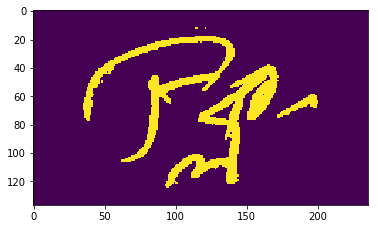

In [9]:
plt.imshow(np.reshape(train_data[0], (137,236)))

In [10]:
y = pd.read_csv('garbage/train.csv')
# print(y.iloc[:].to_numpy())
# m=y.iloc[:].to_numpy()[:,3]
# print(max(m))

In [ ]:
print()

In [11]:
y = pd.read_csv('garbage/train.csv')
m = y.iloc[10000:10500]
print(m.shape)
y_train0=[]
y_train1=[]
y_train2=[]
def to_cat(i):
    val=m.iloc[i][1:4].to_numpy()
    x = np.zeros(168)
    y = np.zeros(11)
    z = np.zeros(7)
#     temp=[]
    x[val[0]]=1
    y[val[1]]=1
    z[val[2]]=1
    y_train0.append(x)
    y_train1.append(y)
    y_train2.append(z)
    #print(temp)
    

for i in range(500):
    to_cat(i)
print(len(y_train0))
print(len(y_train1))
print(len(y_train2))
y_train0=np.asarray(y_train0)
y_train1=np.asarray(y_train1)
y_train2=np.asarray(y_train2)

(500, 5)
500
500
500


In [14]:
model.fit(train_data, {'dense_2':y_train0[:20],'dense_4':y_train1[:20], 'dense_6':y_train2[:20]}, batch_size=15, epochs=10)

W0226 16:38:33.351034 13704 deprecation.py:323] From C:\Users\Assessioner\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
20/20 [==============================] - 22s 1s/step - loss: 35.9035 - dense_2_loss: 9.6755 - dense_4_loss: 11.5511 - dense_6_loss: 14.6769 - dense_2_acc: 0.0000e+00 - dense_4_acc: 0.1500 - dense_6_acc: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 1s 51ms/step - loss: 34.7881 - dense_2_loss: 8.1933 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.0500 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 3/10
20/20 [==============================] - 1s 51ms/step - loss: 32.2119 - dense_2_loss: 5.6170 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.0500 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 4/10
20/20 [==============================] - 1s 51ms/step - loss: 38.1332 - dense_2_loss: 11.5383 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.0500 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 5/10
20/20 [==============================] - 1s 51ms/step - loss: 37.5243 - dense_2_loss: 10.9294 - dense_4_loss:

In [15]:
smodel = model.to_json()
with open('garbage/models/beng.json','w') as json_file:
    json_file.write(smodel)
model.save_weights('garbage/models/bengweights.h5')
print('model saved')

model saved


In [17]:
from keras.models import model_from_json

json_file=open('garbage/models/beng.json','r')
model_loaded = json_file.read()
lmodel = model_from_json(model_loaded)
json_file.close()
lmodel.load_weights('garbage/models/bengweights.h5')

In [21]:
# lmodel.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])
lmodel.fit(train_data, {'dense_2':y_train0[:20],'dense_4':y_train1[:20], 'dense_6':y_train2[:20]}, batch_size=10, epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 93ms/step - loss: 37.0693 - dense_2_loss: 10.4745 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.1000 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 2/10
20/20 [==============================] - 1s 51ms/step - loss: 36.3857 - dense_2_loss: 9.7908 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.1000 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 3/10
20/20 [==============================] - 1s 51ms/step - loss: 36.1734 - dense_2_loss: 9.5786 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.1000 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 4/10
20/20 [==============================] - 1s 51ms/step - loss: 35.7507 - dense_2_loss: 9.1559 - dense_4_loss: 12.0886 - dense_6_loss: 14.5063 - dense_2_acc: 0.1000 - dense_4_acc: 0.0500 - dense_6_acc: 0.1000
Epoch 5/10
20/20 [==============================] - 1s 51ms/step - loss: 37.4504 - dense_2_loss: 10.8556 - dense_4_loss: 12.088